# Week3_Algorithm

In [31]:
from IPython.display import Image

## Question1

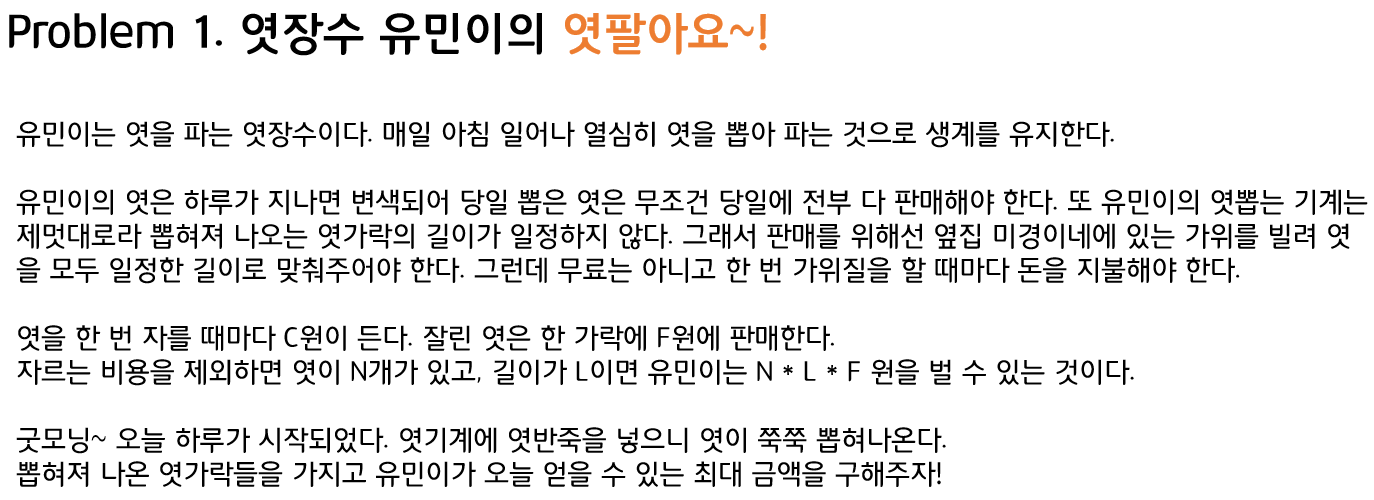

In [32]:
Image('week3_q1_1.png')

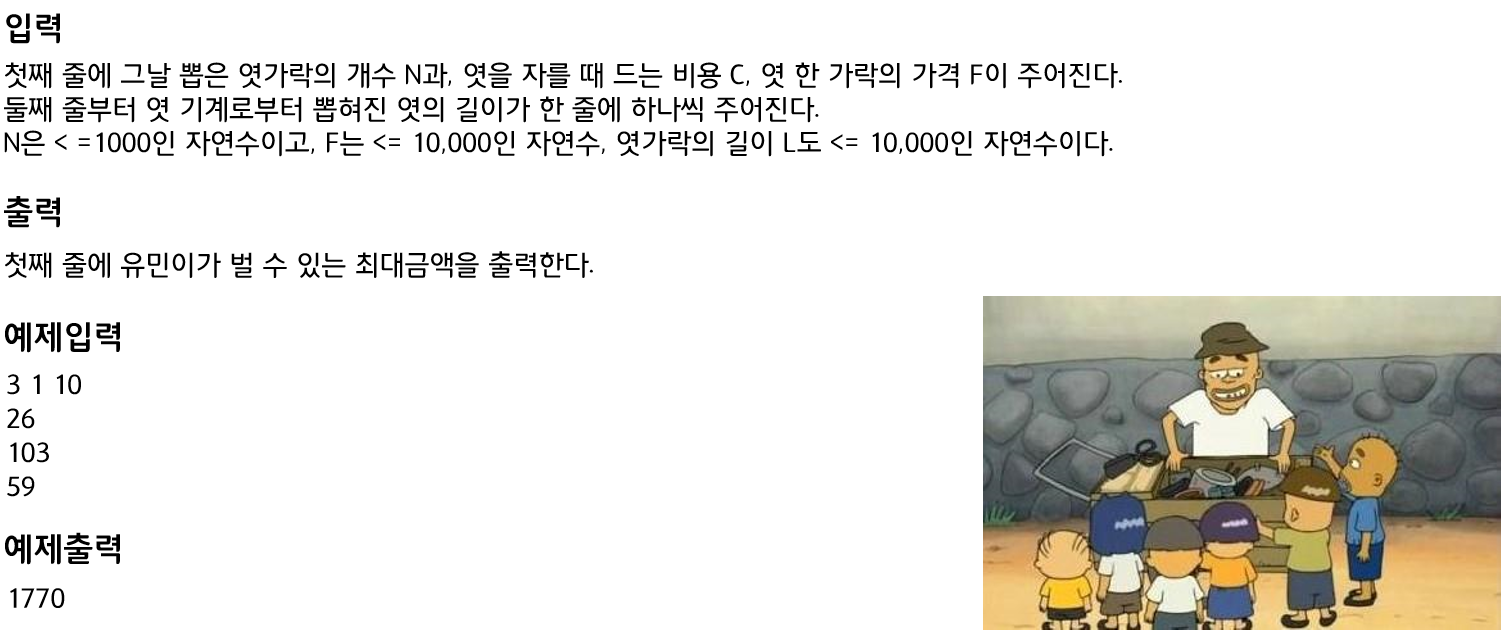

In [33]:
Image('week3_q1_2.png')

#### My answer

In [122]:
n, c, f = map(int, input().split())

total_length = []
for i in range(n):
    l1 = int(input())
    total_length.append(l1)

profit = []

if (sum(total_length)<=10000) & (n<=1000) & (f<=10000):
    
    for each_length in range(1, max(total_length)+1):
        final_profit=0
        gain=0
        cost=0
        for length in total_length:
            num = length // each_length
            gain += num*each_length*f
            if length%each_length==0:
                cost += c*(num-1)
            elif length%each_length!=0:
                cost += c*num
        final_profit = gain-cost
        profit.append(final_profit)
print(max(profit))

3 1 10
26
103
59
1770


## Question2
  
틀림! ㅠ ㅠ

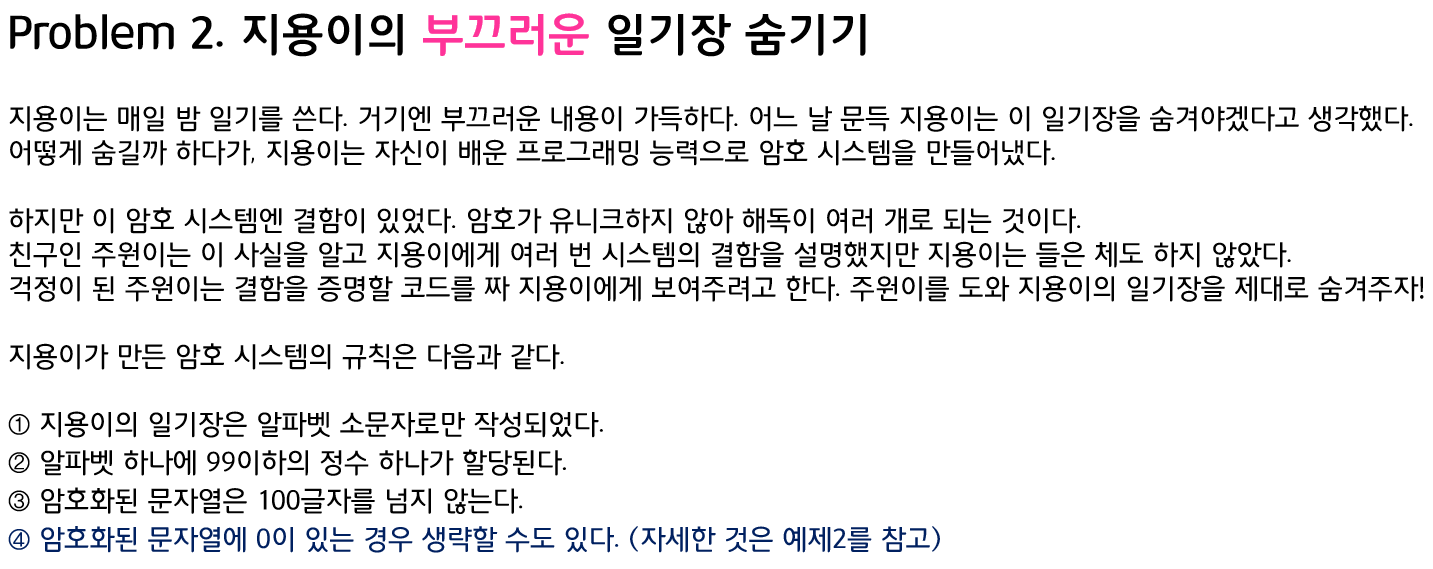

In [34]:
Image('week3_q2_1.png')

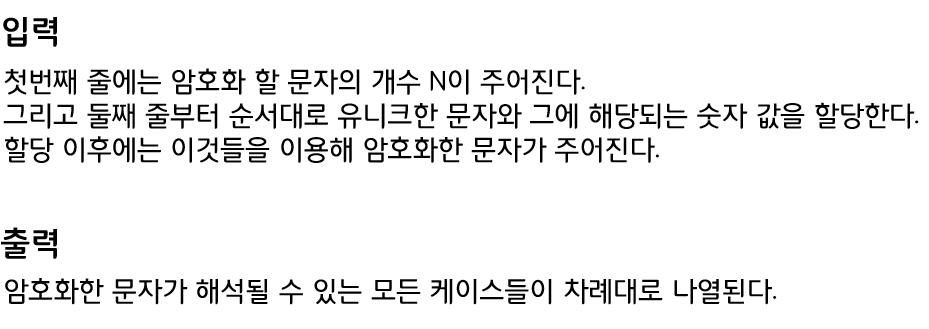

In [35]:
Image('week3_q2_2.png')

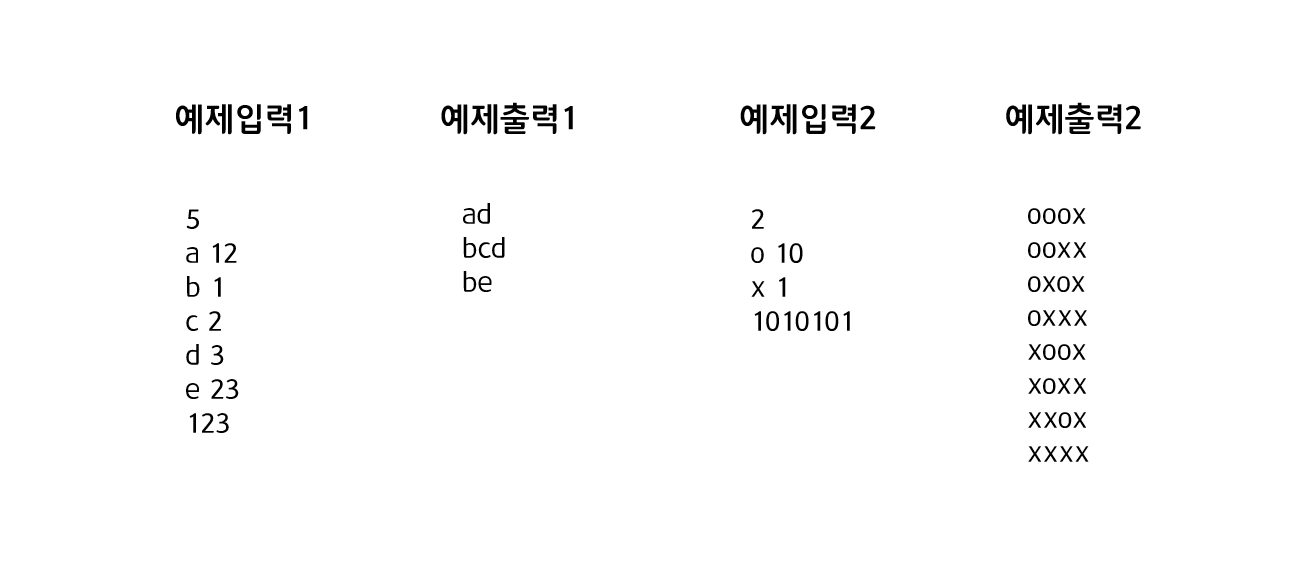

In [36]:
Image('week3_q2_3.png')

#### 우수답안

In [1]:
N = int(input())
codes = [["", "0"]]

for n in range(N):
    codes.append(list(input().split())) # codes : 암호 시스템, [["", 0], [o, 10], [x, 11]]

case = input() # case : 암호화된 문자열 (이걸 해독하는 거임!)

# decoded : case 중 해독된 것
# decodes : 해독된 것 전체 (최종 answer)

def dfs(case, codes, decodes, decoded):
    if case == "": # case안에 있는 모든 문자들을 검색하고 out of index 직후
        if decoded != "":
            tmp = "".join(decoded) 
            if tmp not in decodes: # 내가 전에 했던것처럼 slicing 하는게 아니라 완전탐색 하기 때문에 쓴 듯
                decodes.append(tmp)
        return decodes
    for code in codes:
        if code[1] == case[0:len(code[1])]:
            decoded.append(code[0])
            decodes = dfs(case[len(code[1]):], codes, decodes, decoded)
        else:
            decoded.append("")
        if len(decoded) != 0:
            decoded.pop() # case안에 있는 모든 문자들을 검색하고 out of index 직후에는 ""가 추가될 것. 이 때 생긴 공백을 지워주는 구문
    return decodes

ans = dfs(case, codes, [], [])
ans.sort()
print(ans)

5
a 12
b 1
c 2
d 3
e 23
123
['ad', 'bcd', 'be']


## Question3

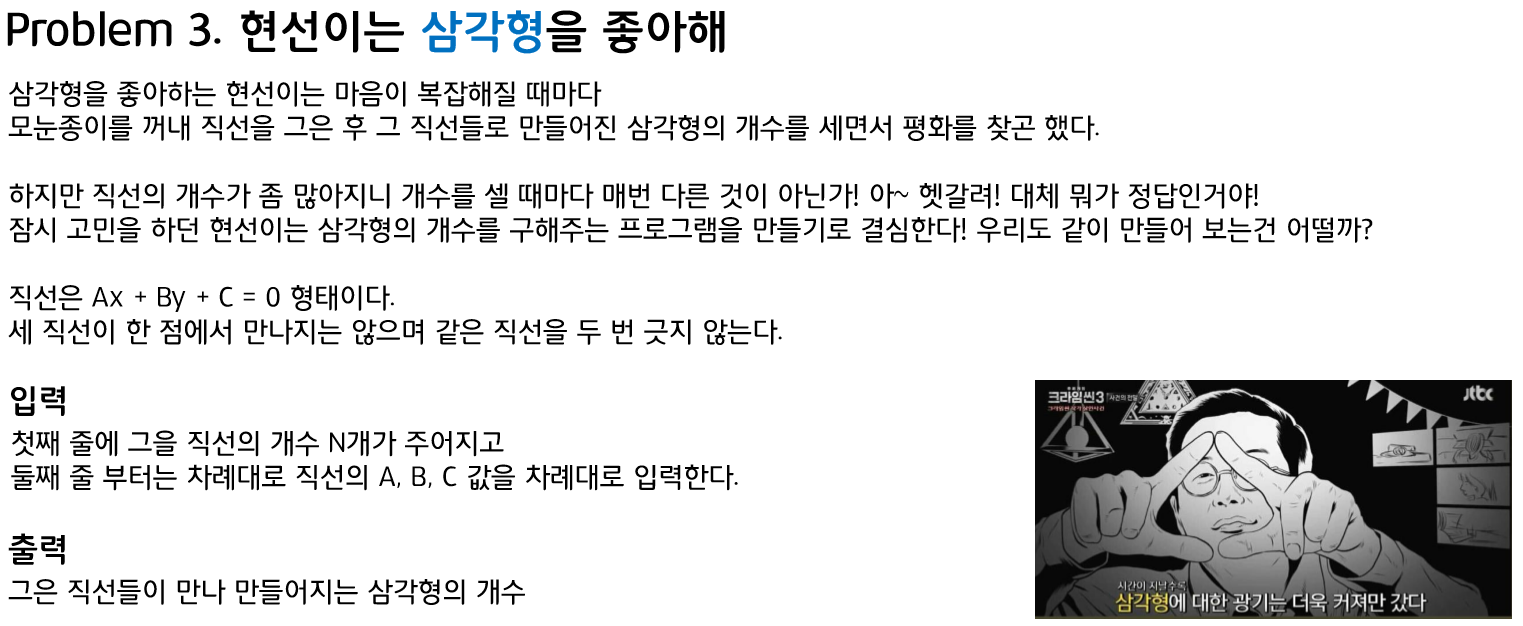

In [38]:
Image('week3_q3_1.png')

#### 우수답안1 : 모형 복잡도 $O(n^{3})$

In [17]:
import numpy as np

num_lines = int(input())
lines_array = np.zeros((num_lines, 3))

for i in range(num_lines):
    lines_array[i,] = list(map(int, input().split()))
    
# 직선 3개가 평행하지 않으면 삼각형을 만들 수 있다.

total_triag = 0
for i in range(0, num_lines-2):
    for j in range(i+1, num_lines-1):
        for k in range(j+1, num_lines): # 모든 경우의 수 추출 가능
            line_i = lines_array[i,:]
            line_j = lines_array[j,:]
            line_k = lines_array[k,:]
            if ((line_i[1]*line_j[0] - line_i[0]*line_j[1])*
               (line_i[1]*line_k[0] - line_i[0]*line_k[1])*
               (line_k[1]*line_j[0] - line_k[0]*line_j[1])) != 0:
                total_triag += 1
print(total_triag)

6
0 1 0
-5 3 0
-5 -2 25
0 1 -3
0 1 -2
-4 -5 29
10


#### 우수답안2 : 모형복잡도 $O(n)$  
  
일종의 점화식.  
  
점화식이란?
: 수열의 각 항이 함수 $f$ 를 이용해서 $f(x)$처럼 귀납적으로 정해져 있을때, 함수 $f$ 를 수열의 점화식이라고 한다.

In [19]:
N = int(input())
lines = []

for _ in range(N):
    line = map(int, input().split())
    lines.append(list(line))

def triangle(lines):
    grads = dict()
    for line in lines:
        grad = line[0]/line[1]
        if grad not in grads:
            grads[grad] = set() # set = 집합. 집합 안 값들은 모두 고유함.
        grads[grad].add(-line[2]/line[1]) # 같은 기울기인 두 변이 있다면, 중복된 key값은 방지하고 같은 key에 -line[2]/line[1]만 추가
    
    grads_key = list(grads.keys())
    line_num = len(grads[grads_key[0]]) # 해당 기울기의 선분의 개수
    tris=0
    dots=0
    for i in range(1, len(grads_key)):
        tris += dots*len(grads[grads_key[i]])
        dots += line_num # 평행한 선분이 두개 있을 때 평행한 선분 3개를 그으면 점 2*3 = 6개가 추가됨 
        line_num += len(grads[grads_key[i]]) # 두번째 기울기의 선분개수 까지 추가해줌 
    return tris

print(triangle(lines))

6
0 1 0
-5 3 0
-5 -2 25
0 1 -3
0 1 -2
-4 -5 29
10


이건 set가 뭔지 체험해보려고... ㅎㅎ

In [25]:
gras = dict()
gras[2/3] = set()
gras[2/3].add(-4/3)
gras[2/3].add(-5/3)
gras[2/3].add(-4/3)

In [26]:
gras

{0.6666666666666666: {-1.6666666666666667, -1.3333333333333333}}

-4/3을 두번 add 했지만 1번만 들어가있다!

#### 모범답안 3  : 모형 복잡도 $O(n)$. 2번보다 빠름
  
경우의 수 이용.  
m = 기울기가 같은 선분을 모은 m개의 묶음  
n = 모든 선분의 수  
$L_{i}$ = $i$번째 기울기 집합의 선분 수  
  
삼각형의 총 수 = ($n^3 - 3n\sum L_{i}^{2} + 2\sum L_{i}^{3}) / 3!$

In [27]:
N = int(input())
grads = {}
ans = 0

for n in range(N):
    grad = 0
    a, b, c = map(int, input().split())
    if b==0:
        grad = float('inf')
    else:
        grad = a/b
    if grad not in grads:
        grads[grad] = 1
    else:
        grads[grad] += 1

val = grads.values()
if N>2:
    num_line = sum(val)
    A = num_line**3
    B = sum(i**2 for i in val)
    C = sum(i**3 for i in val)
    ans = A - 3*num_line*B + 2*C
    if ans<0:
        ans=0
    ans = ans//6
    
print(int(ans%mod))

6
0 1 0
-5 3 0
-5 -2 25
0 1 -3
0 1 -2
-4 -5 29
10
